In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	202.4870

Best Fitness:	200.6737
Solution:	200.0000
Diff:		0.6737

[0:10:32][----------] 1.96% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	209.5014

Best Fitness:	202.2238
Solution:	200.0000
Diff:		2.2238

[0:19:51][----------] 3.92% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	212.9334

Best Fitness:	202.9558
Solution:	200.0000
Diff:		2.9558

[0:29:06][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	209.2657

Best Fitness:	202.7336
Solution:	200.0000
Diff:		2.7336

[0:38:33][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	206.5741

Best Fitness:	201.7344
Solution:	200.0000
Diff:		1.7344

[0:47:11][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.4934

Best Fitness:	201.0110
Solution:	200.0000
Diff:		1.0110

[0:55:41][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	214.7414

Best Fitness:	202.3732
Solution:	200.0000
Diff:		2.3732

[1:04:27][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.1678

Best Fitness:	201.2074
Solution:	200.0000
Diff:		1.2074

[1:13:12][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	211.2071

Best Fitness:	202.9650
Solution:	200.0000
Diff:		2.9650

[1:22:09][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.6394

Best Fitness:	202.1969
Solution:	200.0000
Diff:		2.1969

[1:30:46][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	205.2698

Best Fitness:	201.1942
Solution:	200.0000
Diff:		1.1942

[1:39:02][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.7407

Best Fitness:	202.1171
Solution:	200.0000
Diff:		2.1171

[1:46:50][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.6846

Best Fitness:	201.9604
Solution:	200.0000
Diff:		1.9604

[1:55:04][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.1143

Best Fitness:	201.1069
Solution:	200.0000
Diff:		1.1069

[2:02:46][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	210.9522

Best Fitness:	202.8844
Solution:	200.0000
Diff:		2.8844

[2:10:46][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	206.7240

Best Fitness:	201.7221
Solution:	200.0000
Diff:		1.7221

[2:18:27][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.3877

Best Fitness:	200.8186
Solution:	200.0000
Diff:		0.8186

[2:26:33][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	205.5054

Best Fitness:	200.9316
Solution:	200.0000
Diff:		0.9316

[2:34:08][####------] 35.29% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.6493

Best Fitness:	201.4714
Solution:	200.0000
Diff:		1.4714

[2:41:20][####------] 37.25% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	213.5479

Best Fitness:	202.0898
Solution:	200.0000
Diff:		2.0898

[2:48:26][####------] 39.22% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.3928

Best Fitness:	202.4611
Solution:	200.0000
Diff:		2.4611

[2:55:12][####------] 41.18% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	211.3624

Best Fitness:	201.4871
Solution:	200.0000
Diff:		1.4871

[3:02:11][####------] 43.14% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.7311

Best Fitness:	200.8744
Solution:	200.0000
Diff:		0.8744

[3:09:08][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.7543

Best Fitness:	202.0827
Solution:	200.0000
Diff:		2.0827

[3:15:57][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	203.9771

Best Fitness:	200.8856
Solution:	200.0000
Diff:		0.8856

[3:22:20][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.7198

Best Fitness:	202.1273
Solution:	200.0000
Diff:		2.1273

[3:28:52][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	206.0070

Best Fitness:	201.5725
Solution:	200.0000
Diff:		1.5725

[3:35:19][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.2040

Best Fitness:	200.9751
Solution:	200.0000
Diff:		0.9751

[3:41:40][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	203.8252

Best Fitness:	201.0338
Solution:	200.0000
Diff:		1.0338

[3:48:10][######----] 56.86% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	202.8681

Best Fitness:	200.6896
Solution:	200.0000
Diff:		0.6896

[3:54:52][######----] 58.82% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.1704

Best Fitness:	201.8853
Solution:	200.0000
Diff:		1.8853

[4:01:24][######----] 60.78% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.1745

Best Fitness:	201.6952
Solution:	200.0000
Diff:		1.6952

[4:07:41][######----] 62.75% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.0158

Best Fitness:	201.9620
Solution:	200.0000
Diff:		1.9620

[4:13:53][######----] 64.71% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.4002

Best Fitness:	201.2559
Solution:	200.0000
Diff:		1.2559

[4:20:28][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.0479

Best Fitness:	201.3732
Solution:	200.0000
Diff:		1.3732

[4:26:59][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.4670

Best Fitness:	202.4087
Solution:	200.0000
Diff:		2.4087

[4:33:36][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	209.4329

Best Fitness:	202.6977
Solution:	200.0000
Diff:		2.6977

[4:40:07][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.3348

Best Fitness:	201.0477
Solution:	200.0000
Diff:		1.0477

[4:46:38][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.0428

Best Fitness:	202.0902
Solution:	200.0000
Diff:		2.0902

[4:52:47][########--] 76.47% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	206.3836

Best Fitness:	201.7878
Solution:	200.0000
Diff:		1.7878

[4:58:38][########--] 78.43% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.4674

Best Fitness:	200.8515
Solution:	200.0000
Diff:		0.8515

[5:04:22][########--] 80.39% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	202.3093

Best Fitness:	200.8921
Solution:	200.0000
Diff:		0.8921

[5:09:57][########--] 82.35% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	202.6102

Best Fitness:	200.3588
Solution:	200.0000
Diff:		0.3588

[5:15:10][########--] 84.31% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	202.1651

Best Fitness:	200.4406
Solution:	200.0000
Diff:		0.4406

[5:20:25][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.0138

Best Fitness:	201.6352
Solution:	200.0000
Diff:		1.6352

[5:25:22][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	206.0734

Best Fitness:	201.0213
Solution:	200.0000
Diff:		1.0213

[5:30:17][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	207.5881

Best Fitness:	201.2458
Solution:	200.0000
Diff:		1.2458

[5:35:04][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.2063

Best Fitness:	202.8443
Solution:	200.0000
Diff:		2.8443

[5:39:52][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	209.0085

Best Fitness:	203.1759
Solution:	200.0000
Diff:		3.1759

[5:44:45][##########] 96.08% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	210.0419

Best Fitness:	201.8771
Solution:	200.0000
Diff:		1.8771

[5:49:30][##########] 98.04% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	203.3297

Best Fitness:	201.0601
Solution:	200.0000
Diff:		1.0601

[5:54:25][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:54:25

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
259,5.331385,3.551541,4.148539,4.479260,4.662403,4.109996,3.980738,4.219399,3.683026,4.991368,...,4.603394,4.642994,4.372614,4.183346,3.569273,5.870178,7.171099,7.276465,3.477503,50
260,5.331385,1.815795,3.119000,4.479260,4.662403,4.109996,3.980738,1.664689,3.683026,4.991368,...,4.603394,4.642994,4.372614,4.183346,3.569273,5.870178,6.450931,7.276465,3.477503,50
261,5.331385,1.815795,3.119000,2.432392,4.662403,4.109996,1.705424,1.664689,3.683026,4.414377,...,3.760307,4.642994,4.372614,4.183346,3.569273,3.521915,6.450931,5.130776,3.477503,50
262,3.828939,1.815795,3.119000,2.432392,4.662403,2.928913,1.705424,1.664689,3.683026,4.414377,...,3.760307,4.642994,4.372614,4.183346,3.222880,3.521915,6.450931,4.502511,2.426035,50
263,3.828939,1.815795,3.034172,2.432392,4.662403,2.928913,1.705424,1.664689,3.683026,4.414377,...,3.760307,4.642994,4.372614,4.183346,3.222880,3.521915,5.173623,4.502511,2.426035,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.6737107048051598

Best error for run 1: 2.2237639404091283

Best error for run 2: 2.9558125022033437

Best error for run 3: 2.7336264305183704

Best error for run 4: 1.7343752113532958

Best error for run 5: 1.0110058227457444

Best error for run 6: 2.3732153301909307

Best error for run 7: 1.2074427314947513

Best error for run 8: 2.9649781023865387

Best error for run 9: 2.1969321436990583

Best error for run 10: 1.1941877358998738

Best error for run 11: 2.1170915956860767

Best error for run 12: 1.9604215748333331

Best error for run 13: 1.1068626340249068

Best error for run 14: 2.884415999256163

Best error for run 15: 1.7221131560834237

Best error for run 16: 0.8186461730690553

Best error for run 17: 0.9315697425462872

Best error for run 18: 1.4713624154076683

Best error for run 19: 2.0898169769579624

Best error for run 20: 2.4611110228746895

Best error for run 21: 1.487115847591042

Best error for run 22: 0.8743751391528178

Best error for run 23: 2.082665050732004

Best error for run 24: 0.8856212418367306

Best error for run 25: 2.1272604423430153

Best error for run 26: 1.57247980320804

Best error for run 27: 0.9751004703753949

Best error for run 28: 1.033795505004548

Best error for run 29: 0.6896057513262974

Best error for run 30: 1.885323830486243

Best error for run 31: 1.6952343106476633

Best error for run 32: 1.962032411714432

Best error for run 33: 1.2559037083689475

Best error for run 34: 1.3732341341388405

Best error for run 35: 2.4087352801632846

Best error for run 36: 2.6976703779374134

Best error for run 37: 1.0477327200564446

Best error for run 38: 2.0901547989253686

Best error for run 39: 1.7877817266056866

Best error for run 40: 0.8514630580861251

Best error for run 41: 0.8921053543328696

Best error for run 42: 0.35879442306162446

Best error for run 43: 0.44059254746929355

Best error for run 44: 1.6351940368384419

Best error for run 45: 1.0212916538247612

Best error for run 46: 1.2457852995352994

Best error for run 47: 2.844323681696409

Best error for run 48: 3.1758522879083557

Best error for run 49: 1.8770653620668156

Best error for run 50: 1.0600726334949968

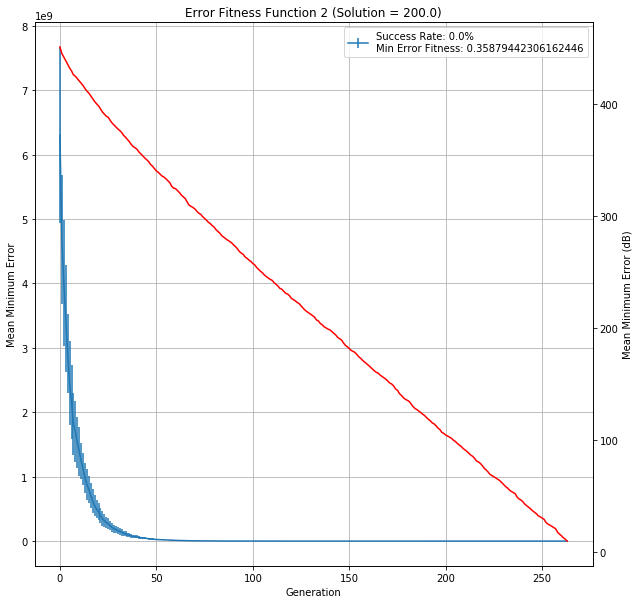

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.8,0.673711,2.223764,2.955813,2.733626,1.734375,1.011006,...,1.635194,1.021292,1.245785,2.844324,3.175852,1.877065,1.060073,1.65033,5:54:25,79800
